In [1]:
# Importing basic libraries for data manipulation and analysis
import numpy as np                # For numerical operations
import pandas as pd # For data manipulation and analysis

#Testing the commit 

# Importing libraries for data visualization
import matplotlib.pyplot as plt   # For basic plotting
import seaborn as sns             # For advanced and aesthetically pleasing visualizations

# Importing libraries for handling dates and times
import datetime                   # For datetime operations
import calendar                   # For calendar-related operations

# Importing libraries for statistical analysis
import scipy.stats as stats       # For statistical tests and distributions
from statsmodels.tsa.stattools import adfuller  # For time series analysis (stationarity test)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # For autocorrelation and partial autocorrelation plots

# Importing libraries for machine learning (optional, for advanced EDA)
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For preprocessing
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets
from sklearn.decomposition import PCA  # For dimensionality reduction

# Setting up display options
pd.set_option('display.max_columns', None)  # Display all columns in DataFrame
pd.set_option('display.max_rows', 100)  # Set the number of rows to display
sns.set(style="whitegrid")  # Set Seaborn style for plots

# Warnings
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings to keep the output clean


In [2]:
df = pd.read_csv("/Users/Jamie/OneDrive/Documents/python_ws/Project_Moon/data/retail_data.csv")

# Data Exploration

In [3]:
df.head()

,customer_id,age,gender,income_bracket,loyalty_program,membership_years,churned,marital_status,number_of_children,education_level,occupation,transaction_id,transaction_date,product_id,product_category,quantity,unit_price,discount_applied,payment_method,store_location,transaction_hour,day_of_week,week_of_year,month_of_year,avg_purchase_value,purchase_frequency,last_purchase_date,avg_discount_used,preferred_store,online_purchases,in_store_purchases,avg_items_per_transaction,avg_transaction_value,total_returned_items,total_returned_value,total_sales,total_transactions,total_items_purchased,total_discounts_received,avg_spent_per_category,max_single_purchase_value,min_single_purchase_value,product_name,product_brand,product_rating,product_review_count,product_stock,product_return_rate,product_size,product_weight,product_color,product_material,product_manufacture_date,product_expiry_date,product_shelf_life,promotion_id,promotion_type,promotion_start_date,promotion_end_date,promotion_effectiveness,promotion_channel,promotion_target_audience,customer_zip_code,customer_city,customer_state,store_zip_code,store_city,store_state,distance_to_store,holiday_season,season,weekend,customer_support_calls,email_subscriptions,app_usage,website_visits,social_media_engagement,days_since_last_purchase
0,1,56,Other,High,No,0,No,Divorced,3,Bachelor's,Self-Employed,503290,2020-10-11 10:08:52,1480,Electronics,8,49.72,0.50,Credit Card,Location A,18,Wednesday,27,7,411.13,Weekly,2021-09-11 04:22:38,0.02,Location A,55,86,8.64,171.83,0,750.40,563.16,69,367,415.01,114.28,679.25,0.28,Product D,Brand Y,2.5,560,48,0.40,Small,4.61,Red,Metal,2019-08-04 01:47:01,2022-05-28 14:54:02,250,271,20% Off,2021-07-14 14:28:42,2022-12-30 13:04:13,High,Online,New Customers,37848,City D,State Y,88500,City D,State Y,33.21,No,Spring,Yes,5,No,High,30,High,40
1,2,69,Female,Medium,No,2,No,Married,2,PhD,Unemployed,347796,2021-12-08 01:07:40,1597,Groceries,7,817.76,0.32,Credit Card,Location C,15,Friday,20,2,268.71,Daily,2021-05-16 12:01:16,0.33,Location C,48,2,9.60,20.18,4,551.60,7554.57,8,475,801.79,305.95,491.56,4.65,Product C,Brand X,4.7,413,80,0.30,Medium,0.84,Blue,Metal,2019-10-23 19:59:17,2022-12-19 08:04:41,180,631,Flash Sale,2021-09-23 04:26:09,2022-09-13 03:16:26,Low,Social Media,New Customers,44896,City A,State X,30046,City C,State X,62.56,No,Summer,Yes,6,No,High,40,Medium,338
2,3,46,Female,Low,No,5,No,Married,3,Bachelor's,Self-Employed,493688,2020-02-17 09:40:48,5142,Toys,8,270.30,0.35,Debit Card,Location A,9,Saturday,35,6,246.79,Weekly,2021-02-07 16:47:48,0.47,Location B,16,45,1.55,55.17,0,629.19,7564.14,73,138,264.31,426.70,938.26,7.30,Product B,Brand X,4.6,312,14,0.08,Medium,0.23,Green,Plastic,2018-05-12 08:00:29,2023-02-01 12:15:07,131,879,Flash Sale,2021-06-13 12:31:15,2022-03-13 00:53:35,Low,Online,New Customers,11816,City B,State X,26169,City A,State Y,83.04,Yes,Winter,Yes,2,Yes,Low,89,Medium,61
3,4,32,Female,Low,No,0,No,Divorced,2,Master's,Employed,861348,2020-08-13 00:43:14,8447,Toys,2,547.84,0.10,Credit Card,Location A,13,Friday,42,8,178.92,Weekly,2021-12-30 23:48:26,0.41,Location B,50,47,1.78,15.79,3,346.67,8125.92,20,158,192.93,689.58,644.31,7.31,Product A,Brand Z,1.1,110,69,0.09,Large,4.37,Blue,Wood,2019-11-15 16:17:29,2023-02-05 11:46:57,16,211,Buy One Get One Free,2021-05-23 05:42:48,2022-02-06 00:42:30,High,Social Media,Returning Customers,78604,City A,State Y,22667,City B,State Z,50.43,Yes,Winter,No,12,No,Low,12,Low,42
4,5,60,Female,Low,Yes,7,Yes,Divorced,2,Bachelor's,Employed,535835,2021-07-02 11:59:03,6025,Clothing,4,785.29,0.17,Mobile Payment,Location C,17,Monday,37,3,214.06,Yearly,2021-11-02 11:48:25,0.22,Location B,48,42,9.38,240.03,2,979.91,114.32,83,263,497.26,715.86,162.86,1.92,Product C,Brand X,3.8,172,25,0.39,Small,1.68,Red,Metal,2019-08-27 02:58:19,2023-10-05 08:13:07,57,862,Flash Sale,2021-04-19 04:55:32,2022-12-04 13:07:09,Medium,Online,New Customers,17760,City B,State Z,87843,City C,State X,36.55,Yes,Summer,Yes,3,No,Medium,31,Low,242


In [4]:
df.shape

(1000000, 78)

In [5]:
df.columns

Index(['customer_id', 'age', 'gender', 'income_bracket', 'loyalty_program',
       'membership_years', 'churned', 'marital_status', 'number_of_children',
       'education_level', 'occupation', 'transaction_id', 'transaction_date',
       'product_id', 'product_category', 'quantity', 'unit_price',
       'discount_applied', 'payment_method', 'store_location',
       'transaction_hour', 'day_of_week', 'week_of_year', 'month_of_year',
       'avg_purchase_value', 'purchase_frequency', 'last_purchase_date',
       'avg_discount_used', 'preferred_store', 'online_purchases',
       'in_store_purchases', 'avg_items_per_transaction',
       'avg_transaction_value', 'total_returned_items', 'total_returned_value',
       'total_sales', 'total_transactions', 'total_items_purchased',
       'total_discounts_received', 'avg_spent_per_category',
       'max_single_purchase_value', 'min_single_purchase_value',
       'product_name', 'product_brand', 'product_rating',
       'product_review_count', '

# Convert columns to appropriate Data Type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 78 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   customer_id                1000000 non-null  int64  
 1   age                        1000000 non-null  int64  
 2   gender                     1000000 non-null  object 
 3   income_bracket             1000000 non-null  object 
 4   loyalty_program            1000000 non-null  object 
 5   membership_years           1000000 non-null  int64  
 6   churned                    1000000 non-null  object 
 7   marital_status             1000000 non-null  object 
 8   number_of_children         1000000 non-null  int64  
 9   education_level            1000000 non-null  object 
 10  occupation                 1000000 non-null  object 
 11  transaction_id             1000000 non-null  int64  
 12  transaction_date           1000000 non-null  object 
 13  product_id   

In [7]:
df['loyalty_program'] = df['loyalty_program'].map({'Yes': True, 'No': False})
df['churned'] = df['churned'].map({'Yes': True, 'No': False})
df['holiday_season'] = df['holiday_season'].map({'Yes': True, 'No': False})
df['weekend'] = df['weekend'].map({'Yes': True, 'No': False})
df['email_subscriptions'] = df['email_subscriptions'].map({'Yes': True, 'No': False})
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [8]:
df.head()

,customer_id,age,gender,income_bracket,loyalty_program,membership_years,churned,marital_status,number_of_children,education_level,occupation,transaction_id,transaction_date,product_id,product_category,quantity,unit_price,discount_applied,payment_method,store_location,transaction_hour,day_of_week,week_of_year,month_of_year,avg_purchase_value,purchase_frequency,last_purchase_date,avg_discount_used,preferred_store,online_purchases,in_store_purchases,avg_items_per_transaction,avg_transaction_value,total_returned_items,total_returned_value,total_sales,total_transactions,total_items_purchased,total_discounts_received,avg_spent_per_category,max_single_purchase_value,min_single_purchase_value,product_name,product_brand,product_rating,product_review_count,product_stock,product_return_rate,product_size,product_weight,product_color,product_material,product_manufacture_date,product_expiry_date,product_shelf_life,promotion_id,promotion_type,promotion_start_date,promotion_end_date,promotion_effectiveness,promotion_channel,promotion_target_audience,customer_zip_code,customer_city,customer_state,store_zip_code,store_city,store_state,distance_to_store,holiday_season,season,weekend,customer_support_calls,email_subscriptions,app_usage,website_visits,social_media_engagement,days_since_last_purchase
0,1,56,Other,High,False,0,False,Divorced,3,Bachelor's,Self-Employed,503290,2020-10-11 10:08:52,1480,Electronics,8,49.72,0.50,Credit Card,Location A,18,Wednesday,27,7,411.13,Weekly,2021-09-11 04:22:38,0.02,Location A,55,86,8.64,171.83,0,750.40,563.16,69,367,415.01,114.28,679.25,0.28,Product D,Brand Y,2.5,560,48,0.40,Small,4.61,Red,Metal,2019-08-04 01:47:01,2022-05-28 14:54:02,250,271,20% Off,2021-07-14 14:28:42,2022-12-30 13:04:13,High,Online,New Customers,37848,City D,State Y,88500,City D,State Y,33.21,False,Spring,True,5,False,High,30,High,40
1,2,69,Female,Medium,False,2,False,Married,2,PhD,Unemployed,347796,2021-12-08 01:07:40,1597,Groceries,7,817.76,0.32,Credit Card,Location C,15,Friday,20,2,268.71,Daily,2021-05-16 12:01:16,0.33,Location C,48,2,9.60,20.18,4,551.60,7554.57,8,475,801.79,305.95,491.56,4.65,Product C,Brand X,4.7,413,80,0.30,Medium,0.84,Blue,Metal,2019-10-23 19:59:17,2022-12-19 08:04:41,180,631,Flash Sale,2021-09-23 04:26:09,2022-09-13 03:16:26,Low,Social Media,New Customers,44896,City A,State X,30046,City C,State X,62.56,False,Summer,True,6,False,High,40,Medium,338
2,3,46,Female,Low,False,5,False,Married,3,Bachelor's,Self-Employed,493688,2020-02-17 09:40:48,5142,Toys,8,270.30,0.35,Debit Card,Location A,9,Saturday,35,6,246.79,Weekly,2021-02-07 16:47:48,0.47,Location B,16,45,1.55,55.17,0,629.19,7564.14,73,138,264.31,426.70,938.26,7.30,Product B,Brand X,4.6,312,14,0.08,Medium,0.23,Green,Plastic,2018-05-12 08:00:29,2023-02-01 12:15:07,131,879,Flash Sale,2021-06-13 12:31:15,2022-03-13 00:53:35,Low,Online,New Customers,11816,City B,State X,26169,City A,State Y,83.04,True,Winter,True,2,True,Low,89,Medium,61
3,4,32,Female,Low,False,0,False,Divorced,2,Master's,Employed,861348,2020-08-13 00:43:14,8447,Toys,2,547.84,0.10,Credit Card,Location A,13,Friday,42,8,178.92,Weekly,2021-12-30 23:48:26,0.41,Location B,50,47,1.78,15.79,3,346.67,8125.92,20,158,192.93,689.58,644.31,7.31,Product A,Brand Z,1.1,110,69,0.09,Large,4.37,Blue,Wood,2019-11-15 16:17:29,2023-02-05 11:46:57,16,211,Buy One Get One Free,2021-05-23 05:42:48,2022-02-06 00:42:30,High,Social Media,Returning Customers,78604,City A,State Y,22667,City B,State Z,50.43,True,Winter,False,12,False,Low,12,Low,42
4,5,60,Female,Low,True,7,True,Divorced,2,Bachelor's,Employed,535835,2021-07-02 11:59:03,6025,Clothing,4,785.29,0.17,Mobile Payment,Location C,17,Monday,37,3,214.06,Yearly,2021-11-02 11:48:25,0.22,Location B,48,42,9.38,240.03,2,979.91,114.32,83,263,497.26,715.86,162.86,1.92,Product C,Brand X,3.8,172,25,0.39,Small,1.68,Red,Metal,2019-08-27 02:58:19,2023-10-05 08:13:07,57,862,Flash Sale,2021-04-19 04:55:32,2022-12-04 13:07:09,Medium,Online,New Customers,17760,City B,State Z,87843,City C,State X,36

# Check for NULL values and DUPLICATES

In [9]:
print(df.isnull().sum())

customer_id                  0
age                          0
gender                       0
income_bracket               0
loyalty_program              0
membership_years             0
churned                      0
marital_status               0
number_of_children           0
education_level              0
occupation                   0
transaction_id               0
transaction_date             0
product_id                   0
product_category             0
quantity                     0
unit_price                   0
discount_applied             0
payment_method               0
store_location               0
transaction_hour             0
day_of_week                  0
week_of_year                 0
month_of_year                0
avg_purchase_value           0
purchase_frequency           0
last_purchase_date           0
avg_discount_used            0
preferred_store              0
online_purchases             0
in_store_purchases           0
avg_items_per_transaction    0
avg_tran

In [10]:
df.duplicated().sum()

0

# Data Visualization

## Sales Analysis (analysis on one company sales)
Sales = Unit Price * Quantity

In [16]:
df.columns

Index(['customer_id', 'age', 'gender', 'income_bracket', 'loyalty_program',
       'membership_years', 'churned', 'marital_status', 'number_of_children',
       'education_level', 'occupation', 'transaction_id', 'transaction_date',
       'product_id', 'product_category', 'quantity', 'unit_price',
       'discount_applied', 'payment_method', 'store_location',
       'transaction_hour', 'day_of_week', 'week_of_year', 'month_of_year',
       'avg_purchase_value', 'purchase_frequency', 'last_purchase_date',
       'avg_discount_used', 'preferred_store', 'online_purchases',
       'in_store_purchases', 'avg_items_per_transaction',
       'avg_transaction_value', 'total_returned_items', 'total_returned_value',
       'total_sales', 'total_transactions', 'total_items_purchased',
       'total_discounts_received', 'avg_spent_per_category',
       'max_single_purchase_value', 'min_single_purchase_value',
       'product_name', 'product_brand', 'product_rating',
       'product_review_count', '

In [32]:
# List of sales-related columns
sales_columns = [
    'transaction_id', 'transaction_date', 'product_id', 'product_category', 
    'quantity', 'unit_price', 'discount_applied', 'total_sales', 
    'total_transactions', 'avg_transaction_value', 'avg_purchase_value', 
    'purchase_frequency', 'avg_items_per_transaction', 'total_items_purchased', 
    'total_returned_items', 'total_returned_value', 'total_discounts_received', 
    'avg_discount_used', 'max_single_purchase_value', 'min_single_purchase_value'
]

# Create new DataFrame with only sales-related columns
sales_df = df[sales_columns]

# Display the first few rows of the new DataFrame to verify
sales_df.head()

,transaction_id,transaction_date,product_id,product_category,quantity,unit_price,discount_applied,total_sales,total_transactions,avg_transaction_value,avg_purchase_value,purchase_frequency,avg_items_per_transaction,total_items_purchased,total_returned_items,total_returned_value,total_discounts_received,avg_discount_used,max_single_purchase_value,min_single_purchase_value
0,503290,2020-10-11 10:08:52,1480,Electronics,8,49.72,0.50,563.16,69,171.83,411.13,Weekly,8.64,367,0,750.40,415.01,0.02,679.25,0.28
1,347796,2021-12-08 01:07:40,1597,Groceries,7,817.76,0.32,7554.57,8,20.18,268.71,Daily,9.60,475,4,551.60,801.79,0.33,491.56,4.65
2,493688,2020-02-17 09:40:48,5142,Toys,8,270.30,0.35,7564.14,73,55.17,246.79,Weekly,1.55,138,0,629.19,264.31,0.47,938.26,7.30
3,861348,2020-08-13 00:43:14,8447,Toys,2,547.84,0.10,8125.92,20,15.79,178.92,Weekly,1.78,158,3,346.67,192.93,0.41,644.31,7.31
4,535835,2021-07-02 11:59:03,6025,Clothing,4,785.29,0.17,114.32,83,240.03,214.06,Yearly,9.38,263,2,979.91,497.26,0.22,162.86,1.92


In [35]:
# Convert transaction_date to date-only format
sales_df['transaction_date'] = pd.to_datetime(sales_df['transaction_date']).dt.date

In [36]:
# Step 2: Group by transaction_date and aggregate relevant columns
aggregated_sales_df = sales_df.groupby('transaction_date').agg({
    'total_sales': 'sum',
    'total_returned_items': 'sum',
    'total_returned_value': 'sum',
    'total_discounts_received': 'sum',
    'max_single_purchase_value': 'max',
    'min_single_purchase_value': 'min',
    # Add more aggregations if necessary
}).reset_index()

# Step 3: Sort by transaction_date
aggregated_sales_df = aggregated_sales_df.sort_values(by=['transaction_date'])

# Display the first few rows to verify the output
aggregated_sales_df.head()

,transaction_id,transaction_date,product_id,product_category,quantity,unit_price,discount_applied,total_sales,total_transactions,avg_transaction_value,avg_purchase_value,purchase_frequency,avg_items_per_transaction,total_items_purchased,total_returned_items,total_returned_value,total_discounts_received,avg_discount_used,max_single_purchase_value,min_single_purchase_value
0,503290,2020-10-11,1480,Electronics,8,49.72,0.50,563.16,69,171.83,411.13,Weekly,8.64,367,0,750.40,415.01,0.02,679.25,0.28
1,347796,2021-12-08,1597,Groceries,7,817.76,0.32,7554.57,8,20.18,268.71,Daily,9.60,475,4,551.60,801.79,0.33,491.56,4.65
2,493688,2020-02-17,5142,Toys,8,270.30,0.35,7564.14,73,55.17,246.79,Weekly,1.55,138,0,629.19,264.31,0.47,938.26,7.30
3,861348,2020-08-13,8447,Toys,2,547.84,0.10,8125.92,20,15.79,178.92,Weekly,1.78,158,3,346.67,192.93,0.41,644.31,7.31
4,535835,2021-07-02,6025,Clothing,4,785.29,0.17,114.32,83,240.03,214.06,Yearly,9.38,263,2,979.91,497.26,0.22,162.86,1.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,234190,2021-12-01,8765,Clothing,6,632.26,0.13,9790.14,24,104.32,415.94,Weekly,5.19,131,9,767.45,554.37,0.14,911.38,8.40
999996,857536,2021-03-25,2902,Groceries,8,872.81,0.20,8547.92,8,361.89,390.48,Weekly,4.48,498,3,929.10,100.26,0.25,457.93,6.84
999997,671852,2020-02-11,154,Groceries,9,870.70,0.49,6118.10,2,323.54,301.80,Daily,8.35,215,6,879.28,474.17,0.38,701.35,4.22
999998,798413,2021-05-19,4711,Electronics,9,594.61,0.40,2739.60,79,465.85,261.88,Yearly,7.46,247,4,705.13,375.36,0.39,589.05,0.89


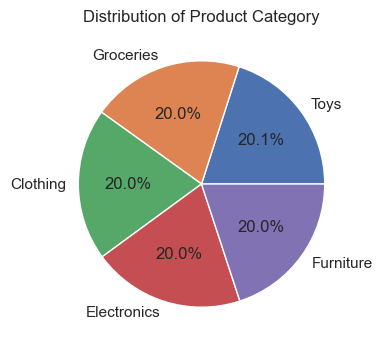

In [27]:
# Aggregate the data to get counts for each Traffic Source
traffic_counts = df['product_category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 4))
plt.pie(traffic_counts, labels=traffic_counts.index, autopct='%1.1f%%')

# Add a title
plt.title('Distribution of Product Category')

# Display the plot
plt.show()

In [37]:
sales_df.set_index('transaction_date',inplace=True)
plt.rcParams['figure.figsize'] = (10, 8)   # Increases the Plot Size
sales_df['total_sales'].plot(grid = True)

<Axes: xlabel='transaction_date'>

Error in callback <function _draw_all_if_interactive at 0x00000241238D34C0> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



OverflowError: Exceeded cell block limit in Agg.  Please set the value of rcParams['agg.path.chunksize'], (currently 0) to be greater than 100 or increase the path simplification threshold(rcParams['path.simplify_threshold'] = 0.111111111111 by default and path.simplify_threshold = 0.111111111111 on the input).

<Figure size 1000x800 with 1 Axes>